In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import regex as re
import matplotlib.pyplot as plt


In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Cleaning Data

Pclass, SibSp, Parch - ordinal, keep as integer

Embarked, Sex - categorical

Cabin NaN - convert to 'NA' for consistency
Replace Nan age with average or median value?


In [5]:
train[['Sex','Embarked']]=train[['Sex','Embarked']].astype('category')

In [6]:
train['Cabin']=train['Cabin'].apply(lambda x: np.where(pd.isna(x),'NA',x))

check string length of all non-numerical columns

In [7]:
train.assign(
    name_len=train['Name'].str.len(),
    sex_len=train['Sex'].str.len(),
    ticket_len=train['Ticket'].str.len(),
    cabin_len=train['Cabin'].str.len(),
    embarked_len=train['Embarked'].str.len()
).describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_len,sex_len,ticket_len,cabin_len,embarked_len
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,891,889,891.000000,891.000000,891.000000,891.000000,889.0
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,148,3,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,NA,S,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,687,644,NaN,NaN,NaN,NaN,NaN
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN,26.965208,4.704826,6.750842,2.363636,1.0
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN,9.281607,0.955980,2.745515,1.194642,0.0
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,12.000000,4.000000,3.000000,1.000000,1.0
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN,20.000000,4.000000,5.000000,2.000000,1.0
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,25.000000,4.000000,6.000000,2.000000,1.0
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,30.000000,6.000000,7.000000,2.000000,1.0


max of cabin_len=15. investigate the anomaly

In [8]:
train.assign(
    cabin_len=train['Cabin'].apply(lambda x: len(x))
    ).query('cabin_len>4 or cabin_len<2').sort_values(by='cabin_len')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_len
473,474,1,2,"Jerwan, Mrs. Amin S (Marie Marthe Thuillard)",female,23.00,0,0,SC/AH Basle 541,13.7917,D,C,1
292,293,0,2,"Levy, Mr. Rene Jacques",male,36.00,0,0,SC/Paris 2163,12.8750,D,C,1
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.00,0,0,113784,35.5000,T,S,1
327,328,1,2,"Ball, Mrs. (Ada E Hall)",female,36.00,0,0,28551,13.0000,D,S,1
699,700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.00,0,0,348121,7.6500,F G63,S,5
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.00,0,0,348123,7.6500,F G73,S,5
715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.00,0,0,348124,7.6500,F G73,S,5
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C,5
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,7
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.00,1,2,113760,120.0000,B96 B98,S,7


Some passengers seem to have been assigned to multiple cabins. Adding cabin_qty column in train

In [9]:
train['cabin_qty']=train['Cabin'].apply(lambda x: np.where(x=="NA",0,len(x.split(' '))))
train.sort_values(by='cabin_qty', ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_qty
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,4
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,4
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,3
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NA,S,0
343,344,0,2,"Sedgwick, Mr. Charles Frederick Waddington",male,25.0,0,0,244361,13.0000,NA,S,0
344,345,0,2,"Fox, Mr. Stanley Hubert",male,36.0,0,0,229236,13.0000,NA,S,0
346,347,1,2,"Smith, Miss. Marion Elsie",female,40.0,0,0,31418,13.0000,NA,S,0


In [131]:
train['cabin_qty'].value_counts()

cabin_qty
0    687
1    178
2     16
3      6
4      2
Name: count, dtype: int64

Due to the limited range of cabin_qty, could be better to have it as categorical variable, cabin_flg where:
- no_cabin: cabin_qty == 0
- one_cabin: cabin_qty == 1
- mult_cabin: cabin_qty > 1

In [132]:
# df['C'] = df['C'].case_when([(cond, df['A'] + df['B']), 
#                              (~cond, df['A'] / df['B']),
#                              ])
train['cabin_flg']=train['cabin_qty'].case_when([
    (train['cabin_qty']==0,'no_cabin'),
    (train['cabin_qty']==1, 'one_cabin'),
    (train['cabin_qty']>1, 'mult_cabin')])


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,lastname,age_flg,age_imp,t_age_imp,l_fare,fare_test,family_onboard,t_sibsp,t_parch,cabin_flg
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,Braund,1,22.0,-0.213201,3.529132,2.110213,sibsp,1,-1.0,no_cabin
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,Cumings,1,38.0,-0.162221,8.787110,4.280593,sibsp,1,-1.0,one_cabin
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,Heikkinen,1,26.0,-0.196116,3.697997,2.188856,no_fam,0,-1.0,no_cabin
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,Futrelle,1,35.0,-0.169031,8.023280,3.990834,sibsp,1,-1.0,one_cabin
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,Allen,1,35.0,-0.169031,3.728064,2.202765,no_fam,0,-1.0,no_cabin


Seeing that some passengers have alphabets in their Ticket number. Adding ticket_flg and ticket_alpha

ticket_flg: 1=has alphabet, 0=only numerical

<!-- ticket_alpha: alphabet from Ticket (no special characters like periods, spaces or slashes) -->

In [10]:
train=train.assign(
    ticket_flg=train['Ticket'].apply(lambda x: np.where(re.search(r"^[0-9]",x)==None,1,0))
# ).query("ticket_flg==1")["Ticket"]) ## seems like non alphanumerical value is a nuances
    # ,ticket_alpha=train['Ticket'].apply(lambda x:''.join(re.findall(r'[a-zA-Z]',x)).upper())
)

Name includes a title. Checking which types of titles are available

In [11]:
train['name_title']=train['Name'].apply(lambda x: re.search(r", (.*?)\.", x).group(1))
train['name_title'].value_counts()

name_title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

Seems like there are a general title like Mr, Mrs, Miss and a special titles such as Master, Lady, Sir, etc. 
Mlle -> Miss, Mme -> Mrs, Don -> Mr
Since some of the titles have very small sample size, "name_title_mod" where foreign titles are translated to english and special titles are grouped

In [12]:
def name_title_modify(x):
    if x in ['Mr','Miss','Mrs', 'Ms']:
        return x
    if x == 'Mlle':
        return "Miss"
    if x == 'Mme':
        return "Mrs"
    if x == 'Don':
        return "Mr"
    else:
        return "special_title"
train['name_title_mod'] = train['name_title'].apply(lambda x: name_title_modify(x))
train['name_title_mod'].value_counts()

name_title_mod
Mr               518
Miss             184
Mrs              126
special_title     62
Ms                 1
Name: count, dtype: int64

2 Embarked datapoints missing. delete rows?

In [13]:
sum(test.Embarked.isnull())

0

No NaN in test['Embarked']. deleting test rows with NaN 'Embarked'

In [14]:
train = train.loc[~train.Embarked.isnull()]

With Parch and SibSP, wonder if it would be best to have these features together as a categorical

Creating family_onboard column where:
- no_fam: alone
- sibsp: has sibsp > 0 & parch = 0
- parch: has parch < 0 & sibsp = 0
- both: has parch & sibsp > 0

In [80]:
# train['family_onboard']=train.apply(lambda x: np.where((x['SibSp']==0)&(x['Parch']==0),'no_fam',
#                                                        np.where((x['SibSp']>0)&(x['Parch']==0), 'sibsp', 
#                                                                 np.where((x['SibSp']==0)&(x['Parch']>0), 'parch',
#                                                                          np.where((x['SibSp']>0)&(x['Parch']>0), 'both', 'NA')))), axis=1)

def family_onboard(row):
    if row['SibSp'] == 0 and row['Parch'] == 0:
        return 'no_fam'
    elif row['SibSp'] > 0 and row['Parch'] == 0:
        return 'sibsp'
    elif row['SibSp'] == 0 and row['Parch'] > 0:
        return 'parch'
    elif row['SibSp'] > 0 and row['Parch'] > 0:
        return 'both'
    else:
        return 'NA'
train['family_onboard'] = train.apply(family_onboard, axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,ticket_flg,name_title,name_title_mod,lastname,age_flg,age_imp,t_age_imp,l_fare,fare_test,family_onboard
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,Mr,Mr,Braund,1,22.0,-0.213201,3.529132,2.110213,sibsp
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,1,Mrs,Mrs,Cumings,1,38.0,-0.162221,8.787110,4.280593,sibsp
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,Miss,Miss,Heikkinen,1,26.0,-0.196116,3.697997,2.188856,no_fam
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,Mrs,Mrs,Futrelle,1,35.0,-0.169031,8.023280,3.990834,sibsp
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,Mr,Mr,Allen,1,35.0,-0.169031,3.728064,2.202765,no_fam


# Exploring Relationships

Fixed Effect: Pclass, Sex, Age, Fare, name_title

Random Effect: lastname, Embarked, Cabin, Parch, SibSp

## Categorical

### Chisquare assumption
1. Independence: no dups
2. Expected Freq: ensure expected_freq is at least 5 for all values
3. Sample size: if expected freq is good, should be ok. Use Fisher's Exact Test instead for small sample

- null hypothesis: varables are independent (no relationship between two variables)
- alt. hypothesis: variables are dependent (relationship between two variables)

In [16]:
import scipy.stats as stats

#### Sex

In [17]:
crosstab=pd.crosstab(train['Sex'], train['Survived'])
res = stats.chi2_contingency(crosstab)
print(crosstab, "pval: ", res.pvalue, "freq: ", res.expected_freq, sep='\n')

Survived    0    1
Sex               
female     81  231
male      468  109
pval: 
3.7799096665576e-58
freq: 
[[192.67491564 119.32508436]
 [356.32508436 220.67491564]]


<Axes: xlabel='Sex'>

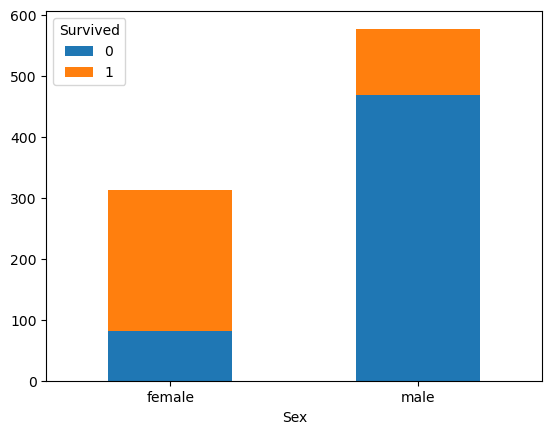

In [18]:
crosstab.plot(kind="bar", stacked=True, rot=0)

every expected_freq>5, no dup => assumption met
p<0.05 => **Sex** related to Survived

#### Embarked

In [19]:
crosstab=pd.crosstab(train['Embarked'], train['Survived'])
res = stats.chi2_contingency(crosstab)
print(crosstab, "pval: ", res.pvalue, "freq: ", res.expected_freq, sep='\n')

Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  217
pval: 
1.769922284120912e-06
freq: 
[[103.7480315  64.2519685]
 [ 47.5511811  29.4488189]
 [397.7007874 246.2992126]]


<Axes: xlabel='Embarked'>

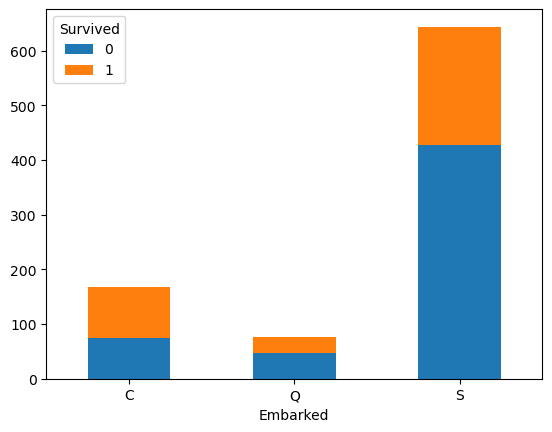

In [20]:
crosstab.plot(kind="bar", stacked=True, rot=0)

every expected_freq>5, no dup => assumption met, p<0.05 => **Embarked** related to Survived

#### Class

In [21]:
crosstab=pd.crosstab(train['Pclass'],train['Survived'])
res = stats.chi2_contingency(crosstab)
print(crosstab, "pval: ", res.pvalue, "freq: ", res.expected_freq, sep='\n')

Survived    0    1
Pclass            
1          80  134
2          97   87
3         372  119
pval: 
1.1813624785477922e-22
freq: 
[[132.1552306  81.8447694]
 [113.6287964  70.3712036]
 [303.215973  187.784027 ]]


<Axes: xlabel='Pclass'>

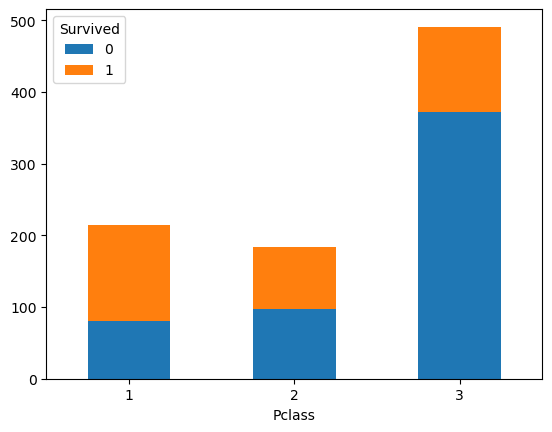

In [22]:
crosstab.plot(kind="bar", stacked=True, rot=0)

#### Title vs Title_mod

In [23]:
crosstab=pd.crosstab(train['name_title'],train['Survived'])
res = stats.chi2_contingency(crosstab)
print(crosstab, "pval: ", res.pvalue, "freq: ", res.expected_freq, sep='\n')

Survived        0    1
name_title            
Capt            1    0
Col             1    1
Don             1    0
Dr              4    3
Jonkheer        1    0
Lady            0    1
Major           1    1
Master         17   23
Miss           55  126
Mlle            0    2
Mme             0    1
Mr            436   81
Mrs            26   98
Ms              0    1
Rev             6    0
Sir             0    1
the Countess    0    1
pval: 
7.329534047032646e-54
freq: 
[[  0.61754781   0.38245219]
 [  1.23509561   0.76490439]
 [  0.61754781   0.38245219]
 [  4.32283465   2.67716535]
 [  0.61754781   0.38245219]
 [  0.61754781   0.38245219]
 [  1.23509561   0.76490439]
 [ 24.70191226  15.29808774]
 [111.77615298  69.22384702]
 [  1.23509561   0.76490439]
 [  0.61754781   0.38245219]
 [319.27221597 197.72778403]
 [ 76.57592801  47.42407199]
 [  0.61754781   0.38245219]
 [  3.70528684   2.29471316]
 [  0.61754781   0.38245219]
 [  0.61754781   0.38245219]]


<Axes: xlabel='name_title'>

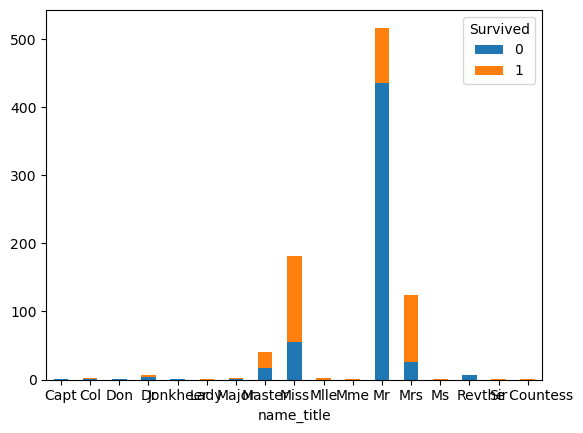

In [24]:
crosstab.plot(kind="bar", stacked=True, rot=0)

In [25]:
crosstab=pd.crosstab(train['name_title_mod'],train['Survived'])
res = stats.chi2_contingency(crosstab)
print(crosstab, "pval: ", res.pvalue, "freq: ", res.expected_freq, sep='\n')

Survived          0    1
name_title_mod          
Miss             55  128
Mr              437   81
Mrs              26   99
Ms                0    1
special_title    31   31
pval: 
3.094158333096768e-60
freq: 
[[113.01124859  69.98875141]
 [319.88976378 198.11023622]
 [ 77.19347582  47.80652418]
 [  0.61754781   0.38245219]
 [ 38.287964    23.712036  ]]


<Axes: xlabel='name_title_mod'>

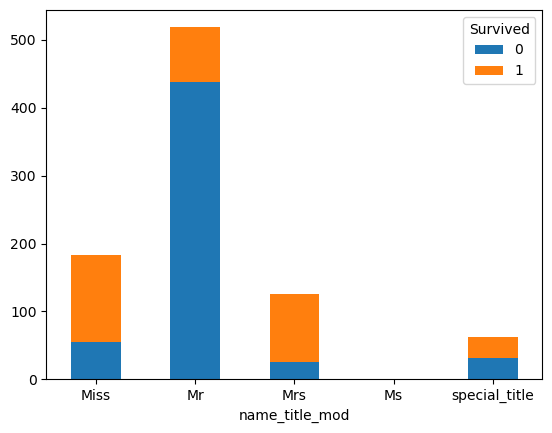

In [26]:
crosstab.plot(kind="bar", stacked=True, rot=0)

In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
# from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
# from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.4678050303477284
            Iterations: 162
            Function evaluations: 163
            Gradient evaluations: 162
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  711
Model:                          Logit   Df Residuals:                      699
Method:                           MLE   Df Model:                           11
Date:                Wed, 23 Oct 2024   Pseudo R-squ.:                  0.2957
Time:                        16:28:54   Log-Likelihood:                -331.44
converged:                       True   LL-Null:                       -470.56
Covariance Type:            nonrobust   LLR p-value:                 3.308e-53
                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------

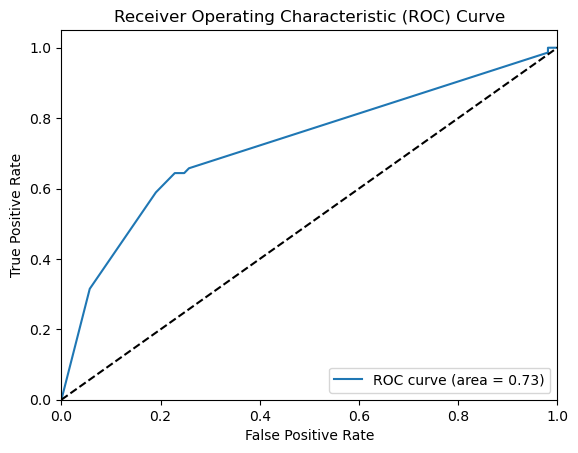


AIC: 686.8757584321634
BIC: 741.6758275898022


In [28]:
encoder = OneHotEncoder(drop='first')
encoded_titles = encoder.fit_transform(train[['name_title']]).toarray()

encoded_feature_names = encoder.get_feature_names_out(['name_title'])
X_encoded_df = pd.DataFrame(encoded_titles, columns=encoded_feature_names)

X_encoded_df = sm.add_constant(X_encoded_df).reset_index(drop=True)
y = train['Survived'].reset_index(drop=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded_df, y, test_size=0.2, random_state=0)

model = sm.Logit(y_train, X_train).fit_regularized(method='l1', alpha=0.1)

print(model.summary())

y_pred_proba = model.predict(X_test)
y_pred = np.where(y_pred_proba > 0.5, 1, 0)  # Convert probabilities to binary outcome (0 or 1)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy * 100:.2f}%")

# Step 11: Calculate Precision, Recall, F1-Score, and ROC-AUC
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")
print(f"ROC-AUC: {roc_auc:.2f}")

# Step 12: Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# Step 13: Print AIC and BIC
aic = model.aic
bic = model.bic
print(f"\nAIC: {aic}")
print(f"BIC: {bic}")
# Optional: Get coefficients (log-odds) and odds ratios
# log_odds = model.params
# odds_ratios = np.exp(log_odds)
# print("\nLog-Odds Coefficients:\n", log_odds)
# print("\nOdds Ratios:\n", odds_ratios)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.4741122218965879
            Iterations: 58
            Function evaluations: 58
            Gradient evaluations: 58
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  711
Model:                          Logit   Df Residuals:                      706
Method:                           MLE   Df Model:                            4
Date:                Wed, 23 Oct 2024   Pseudo R-squ.:                  0.2850
Time:                        16:28:54   Log-Likelihood:                -336.47
converged:                       True   LL-Null:                       -470.56
Covariance Type:            nonrobust   LLR p-value:                 7.849e-57
                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------

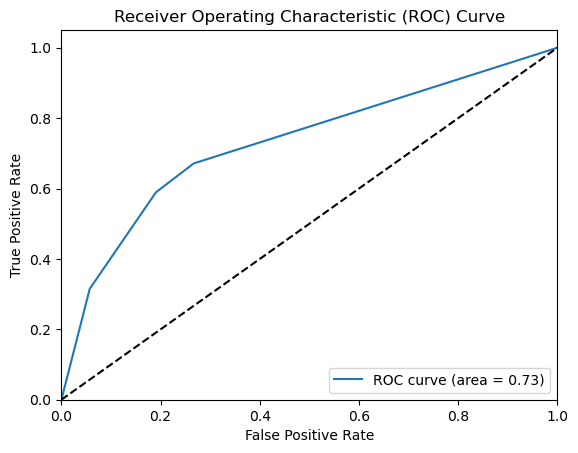


AIC: 682.9394347946486
BIC: 705.7727969436648


In [29]:
encoder = OneHotEncoder(drop='first')
encoded_titles = encoder.fit_transform(train[['name_title_mod']]).toarray()

encoded_feature_names = encoder.get_feature_names_out(['name_title_mod'])
X_encoded_df = pd.DataFrame(encoded_titles, columns=encoded_feature_names)

X_encoded_df = sm.add_constant(X_encoded_df).reset_index(drop=True)
y = train['Survived'].reset_index(drop=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded_df, y, test_size=0.2, random_state=0)

model = sm.Logit(y_train, X_train).fit_regularized(method='l1', alpha=0.1)

print(model.summary())

y_pred_proba = model.predict(X_test)
y_pred = np.where(y_pred_proba > 0.5, 1, 0)  # Convert probabilities to binary outcome (0 or 1)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy * 100:.2f}%")

# Step 11: Calculate Precision, Recall, F1-Score, and ROC-AUC
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")
print(f"ROC-AUC: {roc_auc:.2f}")

# Step 12: Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# Step 13: Print AIC and BIC
aic = model.aic
bic = model.bic
print(f"\nAIC: {aic}")
print(f"BIC: {bic}")

# Optional: Get coefficients (log-odds) and odds ratios
# log_odds = model.params
# odds_ratios = np.exp(log_odds)
# print("\nLog-Odds Coefficients:\n", log_odds)
# print("\nOdds Ratios:\n", odds_ratios)

#### Chisquare test
too many cells with expected freq <5 for name_title.
tested significance using logistic regression with name_title vs name_title_mod.

#### Logistic Regression 
- significance (The proportion of correct predictions out of the total predictions)
    - name_title: miss, mr, mrs
    - name_title_mod: mr, special_title
- Accuracy
    - **name_title**: 71.91%
    - name_title_mod: 70.79%
- Precision (The proportion of positive predictions that are actually correct)
    - **name_title**: 66.20%
    - name_title_mod: 63.64%
- Recall (The proportion of actual positives that were correctly predicted)
    - name_title: 64.38%
    - **name_title_mod**: 67.12%
- F1-Score (harmonic mean of precision and recall. Represents a better balance between the two. Higher the better)
    - name_title: 65.28%
    - name_title_mod: 65.33%
- ROC AUC (A measure of how well the model distinguishes between the two classes. Higher the better (max=1))
    - name_title: 0.73
    - name_title_mod: 0.73    
- AIC BIC 
    - name_title: 686.8758 / 741.6783
    - **name_title_mod**: 682.9394 / 705.7728

Accuracy and precision are slightly better with name_title, but recall and generalization is better with name_title_mod. Will try utilizing each/both on the final model. Maybe change name_title_mod to a binary column that marks 0 for mr, mrs, miss, and 1 for Dr, Master, Sir, etc.

#### ticket_flg

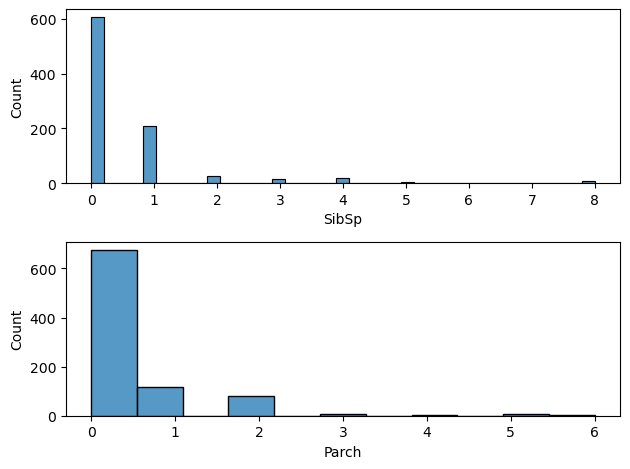

In [128]:
fig, axes = plt.subplots(2,1)
sns.histplot(data=train, x='SibSp', ax=axes[0])
sns.histplot(data=train, x='Parch', ax=axes[1])
plt.tight_layout()
plt.show()

In [71]:
crosstab=pd.crosstab(train['ticket_flg'],train['Survived'])
res = stats.chi2_contingency(crosstab)
print(crosstab, "pval: ", res.pvalue, "freq: ", res.expected_freq, sep='\n')

Survived      0    1
ticket_flg          
0           407  252
1           142   88
pval: 
1.0
freq: 
[[406.9640045 252.0359955]
 [142.0359955  87.9640045]]


ticket_flg is insignificant in predicting survival of passenger. Excluding in the final model

#### family_onboard

In [81]:
crosstab=pd.crosstab(train['family_onboard'],train['Survived'])
res = stats.chi2_contingency(crosstab)
print(crosstab, "pval: ", res.pvalue, "freq: ", res.expected_freq, sep='\n')

Survived          0    1
family_onboard          
both             80   62
no_fam          374  161
parch            24   47
sibsp            71   70
pval: 
2.0649496000121585e-10
freq: 
[[ 87.69178853  54.30821147]
 [330.38807649 204.61192351]
 [ 43.84589426  27.15410574]
 [ 87.07424072  53.92575928]]


## Continuous

For continuous variables, I will utilize the logistic regression to test the individual relationship with the Survived variable.

In [84]:
X = train[['SibSp','Parch']]
y = train['Survived']

X = sm.add_constant(X)
model = sm.Logit(y, X).fit()
print(model.summary())

aic = model.aic
bic = model.bic
print(f"\nAIC: {aic}")
print(f"BIC: {bic}")

# predicted_probs = model.predict(X)
# log_odds = np.log(predicted_probs / (1 - predicted_probs))

# plt.scatter(train['Fare'], log_odds)
# plt.xlabel('Fare')
# plt.ylabel('Log-Odds')
# plt.show()

Optimization terminated successfully.
         Current function value: 0.659042
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            2
Date:                Wed, 23 Oct 2024   Pseudo R-squ.:                0.009335
Time:                        17:07:07   Log-Likelihood:                -585.89
converged:                       True   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                  0.004003
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5132      0.080     -6.416      0.000      -0.670      -0.356
SibSp         -0.1584      0.

In [85]:
for var in X:
    X[f'{var}_log'] = X[var] * np.log(X[var] + 1)

linear_test = sm.add_constant(X.reset_index(drop=True))
linear_test_model = sm.Logit(y, X).fit()
print(linear_test_model.summary())

         Current function value: 0.622479
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      883
Method:                           MLE   Df Model:                            5
Date:                Wed, 23 Oct 2024   Pseudo R-squ.:                 0.06430
Time:                        17:09:11   Log-Likelihood:                -553.38
converged:                      False   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                 5.614e-15
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5222        nan        nan        nan         nan         nan
SibSp          1.4219      0.306      4.644      0.000       0.82

/opt/miniconda3/envs/titanic_env/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [124]:
def transformation(x):
    return (-(x+1) ** (-1/2))+5

train['t_sibsp']=train['SibSp'].apply(lambda x: x**3)
train['t_parch']=train['Parch'].apply(lambda x: -(x+1) ** (-1/2))
X = train[['t_sibsp','t_parch']]
y = train['Survived']

X = sm.add_constant(X)
model = sm.Logit(y, X).fit()
print(model.summary())

aic = model.aic
bic = model.bic
print(f"\nAIC: {aic}")
print(f"BIC: {bic}")

for var in X:
    X[f'{var}_log'] = X[var] * np.log(X[var]+2)

linear_test = sm.add_constant(X.reset_index(drop=True))
linear_test_model = sm.Logit(y, X).fit()
print(linear_test_model.summary())

Optimization terminated successfully.
         Current function value: 0.639411
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            2
Date:                Wed, 23 Oct 2024   Pseudo R-squ.:                 0.03884
Time:                        18:38:04   Log-Likelihood:                -568.44
converged:                       True   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                 1.054e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0216      0.452      4.473      0.000       1.136       2.907
t_sibsp       -0.0325      0.

SibSp and Parch are significant as continuous variable, but does not satisfy the log-odds linearity assumption.

For that, we will go forward with family_onboard instead of SibSp and Parch

In [126]:
print(set(train['SibSp']), set(train['Parch']))

{0, 1, 2, 3, 4, 5, 8} {0, 1, 2, 3, 4, 5, 6}


#### Age

In [31]:
np.isnan(train['Age']).value_counts(normalize=True)

Age
False    0.8009
True     0.1991
Name: proportion, dtype: float64

About 20% of Age data is missing. 
need to check if the missingness of the data has any meaning (related to other columns maybe?)

In [32]:
train['age_flg']=np.where(train.Age.isnull(),0,1)
train['age_flg']=train['age_flg'].astype('category')

In [33]:
for x in train.columns:
    if x in ['Survived','Pclass','Sex','Embarked','ticket_flg','name_title','name_title_mod']:
        crosstab=pd.crosstab(train[x], train['age_flg'])
        res = stats.chi2_contingency(crosstab)
        if res.pvalue <= 0.05:
            print(x, res.pvalue)#, crosstab, res.expected_freq, sep='\n')
            print('---')

Survived 0.00864272442948372
---
Pclass 1.1727232088989982e-10
---
Embarked 4.9505903973894276e-24
---
name_title_mod 0.018269474193170557
---


According to above, missingness of the Age data seems to be related to Survived, Pclass, Embarked, name_title_mod. Let's see how this data perform when modeled with Age

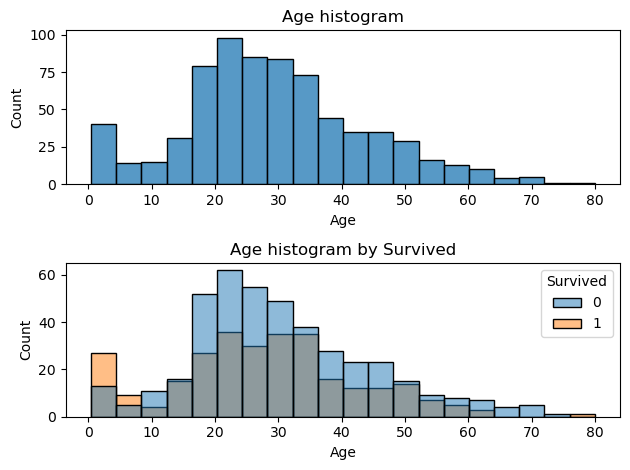

In [34]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1)
sns.histplot(data=train, x='Age', ax=axes[0])
axes[0].set_title('Age histogram')
sns.histplot(data=train, x='Age', hue='Survived', ax=axes[1])
axes[1].set_title('Age histogram by Survived')
plt.tight_layout()
plt.show()

We can see Age is Right-skewed. Also seeing some significance relationship with passenger age below 16 and survival. 
Since data is skewed, we will impute the data with the median

In [35]:
train['age_imp']=train['Age'].fillna(train['Age'].median())

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Define the independent variables
X = train[['age_imp', 'age_flg']]

# Add a constant (intercept) for VIF calculation
X = add_constant(X)

# Calculate VIF for each variable
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

  Variable       VIF
0    const  9.689576
1  age_imp  1.002560
2  age_flg  1.002560


no multicollinearity between age_imp and age_flg

Optimization terminated successfully.
         Current function value: 0.662792
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      887
Method:                           MLE   Df Model:                            1
Date:                Wed, 23 Oct 2024   Pseudo R-squ.:                0.003697
Time:                        16:28:55   Log-Likelihood:                -589.22
converged:                       True   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                   0.03652
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1523      0.171     -0.891      0.373      -0.487       0.183
age_imp       -0.0112      0.

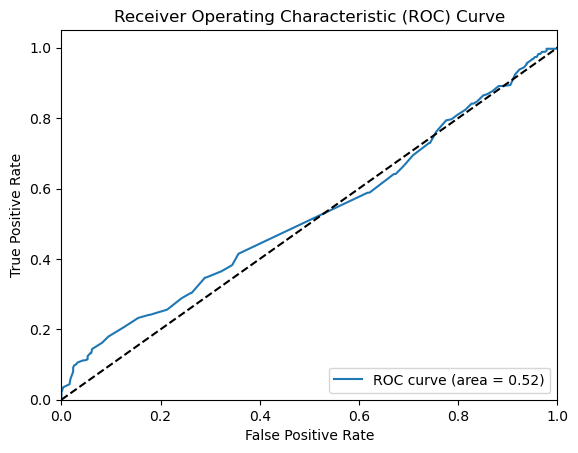


AIC: 1182.4449248742528
BIC: 1192.0251193452807


In [37]:

X = train['age_imp']
y = train['Survived']

X = sm.add_constant(X)
model = sm.Logit(y, X).fit()
print(model.summary())

y_pred_proba = model.predict(X)

fpr, tpr, thresholds = roc_curve(y, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc_score(y, y_pred_proba):.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

aic = model.aic
bic = model.bic
print(f"\nAIC: {aic}")
print(f"BIC: {bic}")



Optimization terminated successfully.
         Current function value: 0.658254
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            2
Date:                Wed, 23 Oct 2024   Pseudo R-squ.:                 0.01052
Time:                        16:28:55   Log-Likelihood:                -585.19
converged:                       True   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                  0.001987
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5479      0.223     -2.456      0.014      -0.985      -0.111
age_flg        0.5067      0.

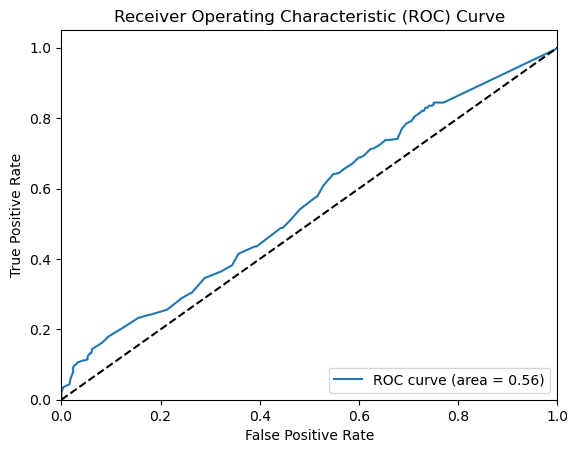


AIC: 1176.3754293863553
BIC: 1190.7457210928972


In [38]:

X = train[['age_flg','age_imp']]
y = train['Survived']

X = sm.add_constant(X)
model = sm.Logit(y, X).fit()
print(model.summary())

y_pred_proba = model.predict(X)

fpr, tpr, thresholds = roc_curve(y, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc_score(y, y_pred_proba):.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

aic = model.aic
bic = model.bic
print(f"\nAIC: {aic}")
print(f"BIC: {bic}")



model with age_imp and age_flg has lower AIC/BIC and slightly higher ROC compared to model with just age_imp.
we will continue with age_imp and age_flg.

In [39]:
train['l_age_imp'] = train['age_imp'].apply(lambda x: x * np.log(x))

y = train['Survived']
X_bt = train[['age_imp','l_age_imp']]

X_bt_constant = sm.add_constant(X_bt, prepend=False)
logit_results = sm.GLM(y, X_bt_constant, family=sm.families.Binomial()).fit()
print(logit_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  889
Model:                            GLM   Df Residuals:                      886
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -584.71
Date:                Wed, 23 Oct 2024   Deviance:                       1169.4
Time:                        16:28:56   Pearson chi2:                     889.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01496
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age_imp       -0.1743      0.055     -3.169      0.0

l_age_imp < 0.05 -> relationship between age_imp and log-odds of survival is non-linear -> violates assumption of logistic regression.
Transformation?

In [40]:

train['age_imp_test'] = train['age_imp'] ** 2
X = train[['age_flg','age_imp_test']]
y = train['Survived']

X = sm.add_constant(X)
model = sm.Logit(y, X).fit()
print(model.summary())

y_pred_proba = model.predict(X)

aic = model.aic
bic = model.bic
print(f"\nAIC: {aic}")
print(f"BIC: {bic}")



Optimization terminated successfully.
         Current function value: 0.659459
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            2
Date:                Wed, 23 Oct 2024   Pseudo R-squ.:                0.008707
Time:                        16:28:56   Log-Likelihood:                -586.26
converged:                       True   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                  0.005802
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.7747      0.177     -4.389      0.000      -1.121      -0.429
age_flg          0.5282

squared transformation is not significant in predicting the survival

In [41]:

train['age_imp_test'] = train['age_imp'] ** 1/2
X = train[['age_flg','age_imp_test']]
y = train['Survived']

X = sm.add_constant(X)
model = sm.Logit(y, X).fit()
print(model.summary())

y_pred_proba = model.predict(X)

aic = model.aic
bic = model.bic
print(f"\nAIC: {aic}")
print(f"BIC: {bic}")



Optimization terminated successfully.
         Current function value: 0.658254
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            2
Date:                Wed, 23 Oct 2024   Pseudo R-squ.:                 0.01052
Time:                        16:28:56   Log-Likelihood:                -585.19
converged:                       True   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                  0.001987
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.5479      0.223     -2.456      0.014      -0.985      -0.111
age_flg          0.5067

In [42]:
train['l_age_imp'] = train['age_imp_test'].apply(lambda x: x * np.log(x))

y = train['Survived']
X_bt = train[['age_imp_test','l_age_imp']]

X_bt_constant = sm.add_constant(X_bt, prepend=False)
logit_results = sm.GLM(y, X_bt_constant, family=sm.families.Binomial()).fit()
print(logit_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  889
Model:                            GLM   Df Residuals:                      886
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -584.71
Date:                Wed, 23 Oct 2024   Deviance:                       1169.4
Time:                        16:28:56   Pearson chi2:                     889.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01496
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
age_imp_test    -0.2964      0.093     -3.200   

sqrt transformation is significant but log-odd is not linear

In [43]:

train['age_imp_test'] = np.log(train['age_imp']+1) ## to avoid log(0) which is -inf/NaN
X = train[['age_flg','age_imp_test']]
y = train['Survived']

X = sm.add_constant(X)
model = sm.Logit(y, X).fit()
print(model.summary())

y_pred_proba = model.predict(X)

aic = model.aic
bic = model.bic
print(f"\nAIC: {aic}")
print(f"BIC: {bic}")

Optimization terminated successfully.
         Current function value: 0.654800
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            2
Date:                Wed, 23 Oct 2024   Pseudo R-squ.:                 0.01571
Time:                        16:28:56   Log-Likelihood:                -582.12
converged:                       True   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                 9.217e-05
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3698      0.415      0.891      0.373      -0.444       1.183
age_flg          0.4458

In [44]:
train['l_age_imp'] = train['age_imp_test'].apply(lambda x: x * np.log(x))

y = train['Survived']
X_bt = train[['age_imp_test','l_age_imp']]

X_bt_constant = sm.add_constant(X_bt, prepend=False)
logit_results = sm.GLM(y, X_bt_constant, family=sm.families.Binomial()).fit()
print(logit_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  889
Model:                            GLM   Df Residuals:                      886
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -582.31
Date:                Wed, 23 Oct 2024   Deviance:                       1164.6
Time:                        16:28:56   Pearson chi2:                     888.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.02026
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
age_imp_test    -2.5782      0.961     -2.682   

log transformation is significant, but not linear

In [45]:

train['age_imp_test'] = train['age_imp'].apply(lambda x: -x ** (-1/2)) ## usually would do -x**(-1/2) but will keep it as positive for easier log-odds calculation.  
X = train[['age_flg','age_imp_test']]
y = train['Survived']

X = sm.add_constant(X)
model = sm.Logit(y, X).fit()
print(model.summary())

aic = model.aic
bic = model.bic
print(f"\nAIC: {aic}")
print(f"BIC: {bic}")

Optimization terminated successfully.
         Current function value: 0.652351
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            2
Date:                Wed, 23 Oct 2024   Pseudo R-squ.:                 0.01939
Time:                        16:28:56   Log-Likelihood:                -579.94
converged:                       True   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                 1.045e-05
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.2632      0.197     -6.414      0.000      -1.649      -0.877
age_flg          0.4168

In [46]:
train['l_age_imp'] = (train['age_imp_test']+abs(train['age_imp_test'].min())+1).apply(lambda x: x * np.log(x))

y = train['Survived']
X_bt = train[['age_imp_test','l_age_imp']]

X_bt_constant = sm.add_constant(X_bt, prepend=False)
logit_results = sm.GLM(y, X_bt_constant, family=sm.families.Binomial()).fit()
print(logit_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  889
Model:                            GLM   Df Residuals:                      886
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -582.29
Date:                Wed, 23 Oct 2024   Deviance:                       1164.6
Time:                        16:28:56   Pearson chi2:                     887.
No. Iterations:                     5   Pseudo R-squ. (CS):            0.02031
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
age_imp_test   -12.4565     13.416     -0.928   

reverse sqrt transformation is significant in predicting Survived and is linear to log-odds of survival. Will keep this transformation.

In [47]:
train = (train
         .rename(columns={"age_imp_test":"t_age_imp"})
         .drop(['l_age_imp'], axis=1))

Optimization terminated successfully.
         Current function value: 0.652351
         Iterations 5


cooks_max = 0.04286082061619201 
 raw_index = 163
(array([163, 385]),)
     PassengerId  Survived  Pclass                       Name   Sex   Age  \
163          164         0       3            Calic, Mr. Jovo  male  17.0   
385          386         0       2  Davies, Mr. Charles Henry  male  18.0   

     SibSp  Parch        Ticket     Fare Cabin Embarked  cabin_qty  \
163      0      0        315093   8.6625    NA        S          0   
385      0      0  S.O.C. 14879  73.5000    NA        S          0   

     ticket_flg name_title name_title_mod lastname age_flg  age_imp  t_age_imp  
163           0         Mr             Mr    Calic       1     17.0  -0.242536  
385           1         Mr             Mr   Davies       1     18.0  -0.235702  


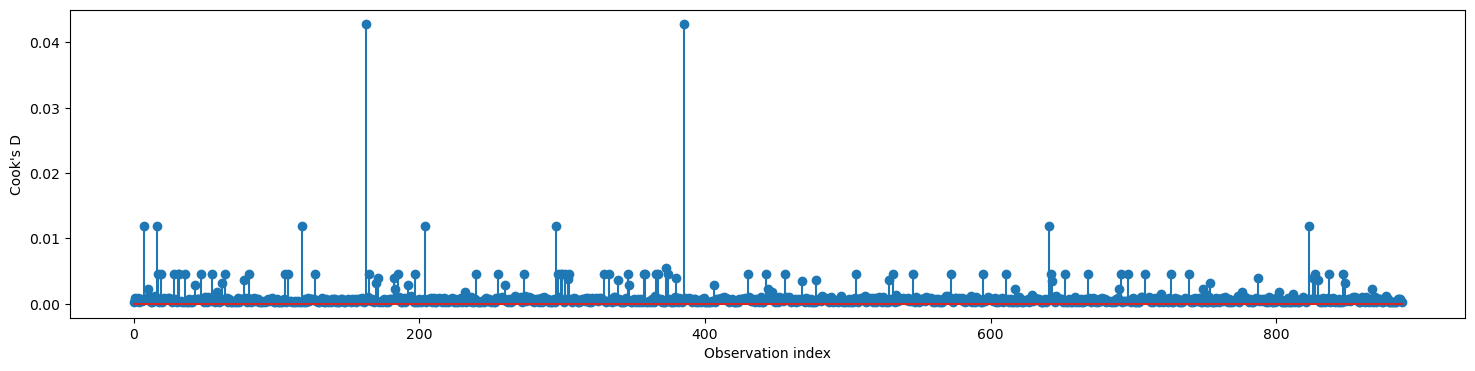

In [48]:
import matplotlib.pyplot as plt
X = train[['age_flg','t_age_imp']]
y = train['Survived']

X = sm.add_constant(X)
model = sm.Logit(y, X).fit()
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]


plt.subplots(figsize=(18,4))
plt.xlabel('Observation index')
plt.ylabel('Cook\'s D')
plt.stem(np.arange(len(train)),cooks_d)
print('cooks_max =',cooks_d.max(),'\n','raw_index =',np.argmax(cooks_d))

threshold = 0.04
influential_points = np.where(cooks_d > threshold)
print(influential_points)
print(train.loc[influential_points])

The biggest cook's distance is 0.04 which is way less than 1. Plus, we have large enough data so no need to set the threshold as 4/n.
We will keep all data points.

#### Fare

In [49]:
np.isnan(train['Fare']).value_counts(normalize=True)

Fare
False    1.0
Name: proportion, dtype: float64

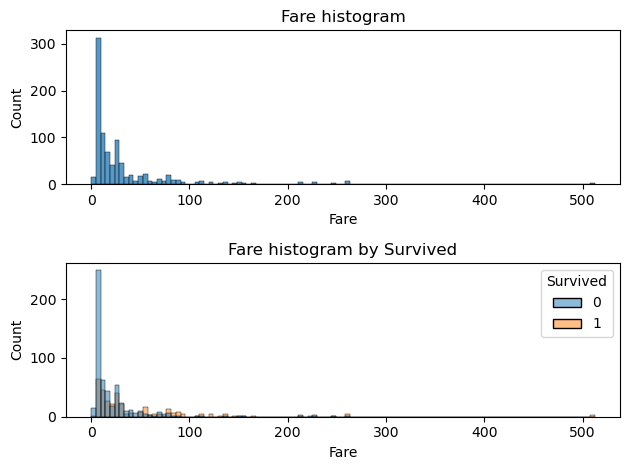

In [50]:

fig, axes = plt.subplots(2, 1)
sns.histplot(data=train, x='Fare', ax=axes[0])
axes[0].set_title('Fare histogram')
sns.histplot(data=train, x='Fare', hue='Survived', ax=axes[1])
axes[1].set_title('Fare histogram by Survived')
plt.tight_layout()
plt.show()

In [51]:
X = train[['Fare', 'Pclass']]
X = add_constant(X)

vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

  Variable        VIF
0    const  15.380246
1     Fare   1.429625
2   Pclass   1.429625


In [52]:
X.corr()

,const,Fare,Pclass
const,NaN,NaN,NaN
Fare,NaN,1.000000,-0.548193
Pclass,NaN,-0.548193,1.000000


Needed to check for multicollineairty between Fare and Class since it is natural to have a higher class ticket to be more expensive.
correlation matrix shows significant linear relationship while VIF shows no significant multicollinearity.
Thus, we will proceed using both variables in the final model

Optimization terminated successfully.
         Current function value: 0.627274
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      887
Method:                           MLE   Df Model:                            1
Date:                Wed, 23 Oct 2024   Pseudo R-squ.:                 0.05709
Time:                        16:28:57   Log-Likelihood:                -557.65
converged:                       True   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                 2.082e-16
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9395      0.095     -9.893      0.000      -1.126      -0.753
Fare           0.0150      0.

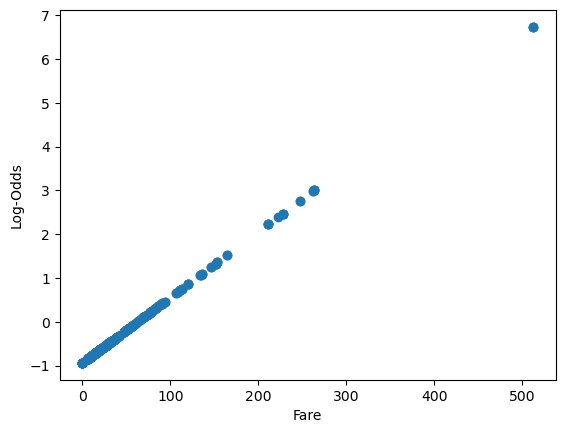

In [53]:
X = train[['Fare']]
y = train['Survived']

X = sm.add_constant(X)
model = sm.Logit(y, X).fit()
print(model.summary())

aic = model.aic
bic = model.bic
print(f"\nAIC: {aic}")
print(f"BIC: {bic}")

predicted_probs = model.predict(X)
log_odds = np.log(predicted_probs / (1 - predicted_probs))

plt.scatter(train['Fare'], log_odds)
plt.xlabel('Fare')
plt.ylabel('Log-Odds')
plt.show()

In [54]:
train['l_fare'] = (train['Fare']+1).apply(lambda x: x * np.log(x))

y = train['Survived']
X_bt = train[['Fare','l_fare']]

X_bt_constant = sm.add_constant(X_bt, prepend=False)
logit_results = sm.GLM(y, X_bt_constant, family=sm.families.Binomial()).fit()
print(logit_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  889
Model:                            GLM   Df Residuals:                      886
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -546.87
Date:                Wed, 23 Oct 2024   Deviance:                       1093.7
Time:                        16:28:58   Pearson chi2:                     889.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.09534
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Fare           0.0798      0.013      6.308      0.0

Fare is significant variable in predicting the survival, but doesn't satisfy the log-odds assumption of logistic regression. Need transformation

In [55]:
train['fare_test'] = train['Fare'] ** 4
X = train[['fare_test']]
y = train['Survived']

X = sm.add_constant(X)
model = sm.Logit(y, X).fit()
print(model.summary())

aic = model.aic
bic = model.bic
print(f"\nAIC: {aic}")
print(f"BIC: {bic}")

Optimization terminated successfully.
         Current function value: 0.657525
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      887
Method:                           MLE   Df Model:                            1
Date:                Wed, 23 Oct 2024   Pseudo R-squ.:                 0.01161
Time:                        16:28:58   Log-Likelihood:                -584.54
converged:                       True   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                 0.0002102
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5210      0.070     -7.400      0.000      -0.659      -0.383
fare_test   4.117e-10   1.61e

In [56]:
train['l_fare'] = (train['fare_test']+1).apply(lambda x: x * np.log(x)) #add 1 to avoid -inf

y = train['Survived']
X_bt = train[['Fare','l_fare']]

X_bt_constant = sm.add_constant(X_bt, prepend=False)
logit_results = sm.GLM(y, X_bt_constant, family=sm.families.Binomial()).fit()
print(logit_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  889
Model:                            GLM   Df Residuals:                      886
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -556.95
Date:                Wed, 23 Oct 2024   Deviance:                       1113.9
Time:                        16:28:58   Pearson chi2:                     926.
No. Iterations:                     5   Pseudo R-squ. (CS):            0.07459
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Fare           0.0157      0.002      6.831      0.0

In [57]:
train['fare_test'] = np.log(train['Fare']+1) #add 1 to avoid -inf
X = train[['fare_test']]
y = train['Survived']

X = sm.add_constant(X)
model = sm.Logit(y, X).fit()
print(model.summary())

aic = model.aic
bic = model.bic
print(f"\nAIC: {aic}")
print(f"BIC: {bic}")

Optimization terminated successfully.
         Current function value: 0.609266
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      887
Method:                           MLE   Df Model:                            1
Date:                Wed, 23 Oct 2024   Pseudo R-squ.:                 0.08416
Time:                        16:28:58   Log-Likelihood:                -541.64
converged:                       True   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                 1.919e-23
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8021      0.265    -10.587      0.000      -3.321      -2.283
fare_test      0.7699      0.

In [58]:
train['l_fare'] = (train['fare_test']+1).apply(lambda x: x * np.log(x)) #add 1 to avoid -inf

y = train['Survived']
X_bt = train[['fare_test','l_fare']]

X_bt_constant = sm.add_constant(X_bt, prepend=False)
logit_results = sm.GLM(y, X_bt_constant, family=sm.families.Binomial()).fit()
print(logit_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  889
Model:                            GLM   Df Residuals:                      886
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -541.34
Date:                Wed, 23 Oct 2024   Deviance:                       1082.7
Time:                        16:28:58   Pearson chi2:                     900.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1065
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
fare_test      1.8124      1.426      1.271      0.2

#### Final Model

In [154]:
def fit_logit(data, target_col, cat_cols):
    cont_cols = [x for x in target_col if x not in cat_cols]
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    encoded_features = encoder.fit_transform(data[cat_cols])
    encoded_column_names = encoder.get_feature_names_out(cat_cols)
    encoded_df = pd.DataFrame(encoded_features, columns=encoded_column_names).reset_index(drop=True)
    continuous_df = X[cont_cols].reset_index(drop=True)

    X_encoded = pd.concat([continuous_df, encoded_df], axis=1).reset_index(drop=True)

    X_encoded = sm.add_constant(X_encoded)
    model = sm.Logit(y, X_encoded).fit()
    print(model.summary())
    print("\naic: {}".format(model.aic))
    print("bic: {}".format(model.bic))

    vif = pd.DataFrame()
    vif['Variable'] = X_encoded.columns
    vif['VIF'] = [variance_inflation_factor(X_encoded.values, i) for i in range(X_encoded.shape[1])]
    print(vif)

    linear_test = train[cont_cols].copy()
    for var in cont_cols:
        linear_test[f'{var}_log'] = linear_test[var] * np.log(linear_test[var] + 2)  # Add a small constant to avoid log(0)

    linear_test = sm.add_constant(linear_test.reset_index(drop=True))
    linear_test_model = sm.Logit(y, linear_test).fit()

    print(linear_test_model.summary())

fit_logit(data=train, 
          target_col=['Pclass', 'Sex', 'age_flg', 't_age_imp', 'SibSp', 'Parch','l_fare', 'name_title_mod', 'Embarked', 'cabin_qty'], 
          cat_cols=['Pclass', 'Sex', 'age_flg', 'name_title_mod', 'Embarked'])

         Current function value: 0.415520
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      873
Method:                           MLE   Df Model:                           15
Date:                Wed, 23 Oct 2024   Pseudo R-squ.:                  0.3754
Time:                        19:43:41   Log-Likelihood:                -369.40
converged:                      False   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                 3.747e-85
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2223      0.734      0.303      0.762      -1.216       1.660
t_age_imp  

/opt/miniconda3/envs/titanic_env/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [151]:
X_cols = ['Pclass', 'Sex', 'age_flg', 't_age_imp', 'SibSp', 'Parch','l_fare', 'name_title_mod', 'Embarked', 'cabin_qty']
cat_cols = ['Pclass', 'Sex', 'age_flg', 'name_title_mod', 'Embarked']
cont_cols = [x for x in X_cols if x not in cat_cols]

X = train[X_cols]
y = train['Survived'].reset_index(drop=True)

encoder = OneHotEncoder(drop='first', sparse_output=False)

encoded_features = encoder.fit_transform(X[cat_cols])
encoded_column_names = encoder.get_feature_names_out(cat_cols)
encoded_df = pd.DataFrame(encoded_features, columns=encoded_column_names).reset_index(drop=True)
continuous_df = X[cont_cols].reset_index(drop=True)

X_encoded = pd.concat([continuous_df, encoded_df], axis=1).reset_index(drop=True)

X_encoded = sm.add_constant(X_encoded)
model = sm.Logit(y, X_encoded).fit()
print(model.summary())
print("\naic: {}".format(model.aic))
print("bic: {}".format(model.bic))

vif = pd.DataFrame()
vif['Variable'] = X_encoded.columns
vif['VIF'] = [variance_inflation_factor(X_encoded.values, i) for i in range(X_encoded.shape[1])]
print(vif)

linear_test = train[cont_cols].copy()
for var in cont_cols:
    linear_test[f'{var}_log'] = linear_test[var] * np.log(linear_test[var] + 2)  # Add a small constant to avoid log(0)

linear_test = sm.add_constant(linear_test.reset_index(drop=True))
linear_test_model = sm.Logit(y, linear_test).fit()

# Print the summary to check the significance of interaction terms
print(linear_test_model.summary())

         Current function value: 0.415520
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      873
Method:                           MLE   Df Model:                           15
Date:                Wed, 23 Oct 2024   Pseudo R-squ.:                  0.3754
Time:                        19:17:01   Log-Likelihood:                -369.40
converged:                      False   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                 3.747e-85
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2223      0.734      0.303      0.762      -1.216       1.660
t_age_imp  

/opt/miniconda3/envs/titanic_env/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [149]:
X_cols = ['Pclass', 'Sex', 'age_flg', 't_age_imp', 'family_onboard','l_fare', 'name_title_mod', 'Embarked','cabin_flg']
cat_cols = ['Pclass', 'Sex', 'name_title_mod', 'age_flg', 'family_onboard', 'Embarked', 'cabin_flg']
cont_cols = [x for x in X_cols if x not in cat_cols]

X = train[X_cols]
y = train['Survived'].reset_index(drop=True)

encoder = OneHotEncoder(drop='first', sparse_output=False)

encoded_features = encoder.fit_transform(X[cat_cols])
encoded_column_names = encoder.get_feature_names_out(cat_cols)
encoded_df = pd.DataFrame(encoded_features, columns=encoded_column_names).reset_index(drop=True)
continuous_df = X[cont_cols].reset_index(drop=True)

X_encoded = pd.concat([continuous_df, encoded_df], axis=1).reset_index(drop=True)

X_encoded = sm.add_constant(X_encoded)
model = sm.Logit(y, X_encoded).fit()
print(model.summary())
print("\naic: {}".format(model.aic))
print("bic: {}".format(model.bic))

vif = pd.DataFrame()
vif['Variable'] = X_encoded.columns
vif['VIF'] = [variance_inflation_factor(X_encoded.values, i) for i in range(X_encoded.shape[1])]
print(vif)

linear_test = train[cont_cols].copy()
for var in cont_cols:
    linear_test[f'{var}_log'] = linear_test[var] * np.log(linear_test[var] + 2)  # Add a small constant to avoid log(0)

linear_test = sm.add_constant(linear_test.reset_index(drop=True))
linear_test_model = sm.Logit(y, linear_test).fit()

# Print the summary to check the significance of interaction terms
print(linear_test_model.summary())

         Current function value: 0.426252
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      871
Method:                           MLE   Df Model:                           17
Date:                Wed, 23 Oct 2024   Pseudo R-squ.:                  0.3593
Time:                        19:16:53   Log-Likelihood:                -378.94
converged:                      False   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                 1.117e-79
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.3672      1.037      0.354      0.723      -1.665       2.399
t_age_imp  

/opt/miniconda3/envs/titanic_env/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [130]:
linear_test = train[cont_cols].copy()
for var in cont_cols:
    linear_test[f'{var}_log'] = linear_test[var] * np.log(linear_test[var] + 2)  # Add a small constant to avoid log(0)

linear_test = sm.add_constant(linear_test.reset_index(drop=True))
linear_test_model = sm.Logit(y, linear_test).fit()

# Print the summary to check the significance of interaction terms
print(linear_test_model.summary())

Optimization terminated successfully.
         Current function value: 0.574793
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      880
Method:                           MLE   Df Model:                            8
Date:                Wed, 23 Oct 2024   Pseudo R-squ.:                  0.1360
Time:                        18:53:57   Log-Likelihood:                -510.99
converged:                       True   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                 1.069e-30
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -4.5155      1.293     -3.492      0.000      -7.050      -1.981
Pclass            5.

In [152]:
y_pred_proba = model.predict(X_encoded)

# Create deciles of predicted probabilities
y_pred_decile = pd.qcut(y_pred_proba, 10)

# Create a DataFrame with observed and predicted values
df_hl = pd.DataFrame({'observed': y, 'predicted': y_pred_proba, 'decile': y_pred_decile})

# Calculate observed and expected frequencies for each decile
obs_freq = df_hl.groupby('decile')['observed'].sum()
exp_freq = df_hl.groupby('decile')['predicted'].sum()

# Perform the Hosmer-Lemeshow test
hl_stat = ((obs_freq - exp_freq) ** 2 / exp_freq).sum()
hl_p_value = 1 - stats.chi2.cdf(hl_stat, df=8)  # df = number of deciles - 2

print(f"Hosmer-Lemeshow test statistic: {hl_stat}")
print(f"Hosmer-Lemeshow p-value: {hl_p_value}")

Hosmer-Lemeshow test statistic: 8.863237822106614
Hosmer-Lemeshow p-value: 0.3539641947245533


/var/folders/fw/_g62bz0j0r74tll460_ymnd80000gp/T/ipykernel_1298/2474175564.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_freq = df_hl.groupby('decile')['observed'].sum()
/var/folders/fw/_g62bz0j0r74tll460_ymnd80000gp/T/ipykernel_1298/2474175564.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  exp_freq = df_hl.groupby('decile')['predicted'].sum()


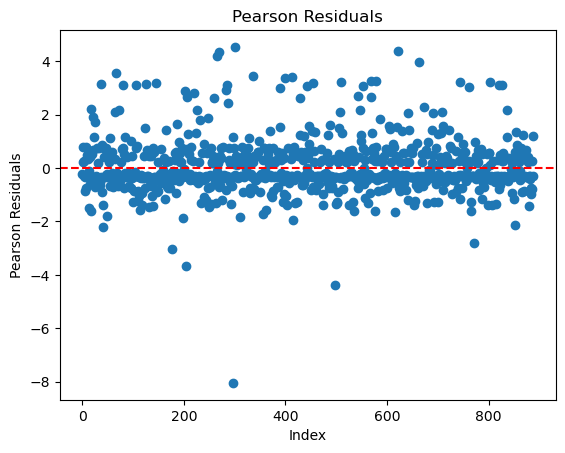

In [62]:
pearson_residuals = model.resid_pearson

# Plot Pearson residuals
plt.scatter(X_encoded.index, pearson_residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Pearson Residuals')
plt.title('Pearson Residuals')
plt.show()

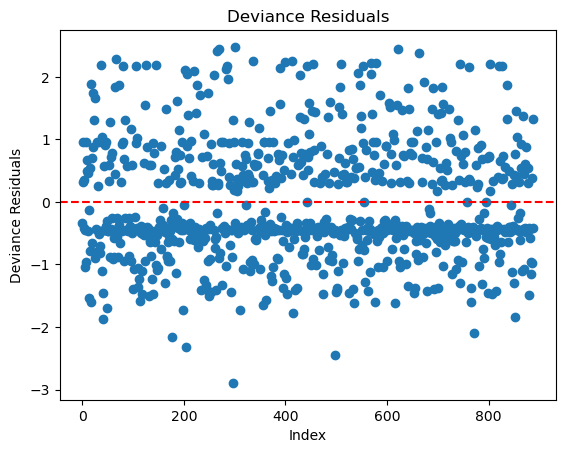

In [63]:
deviance_residuals = model.resid_dev

# Plot deviance residuals
plt.scatter(X_encoded.index, deviance_residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Deviance Residuals')
plt.title('Deviance Residuals')
plt.show()

In [64]:
pearson_residuals = model.resid_pearson

# Create a DataFrame with residuals and the corresponding index or data points
residuals_df = pd.DataFrame({
    'index': X_encoded.index,  # Add index or ID for reference
    'pearson_residuals': pearson_residuals
})

# Filter rows where the residuals are close to -8
outliers = residuals_df[residuals_df['pearson_residuals'] < -7.5]

In [66]:
X_encoded.loc[outliers['index']]

,const,Pclass,t_age_imp,SibSp,Parch,l_fare,cabin_qty,Sex_male,name_title_mod_Mr,name_title_mod_Mrs,name_title_mod_Ms,name_title_mod_special_title,age_flg_1
296,1.0,1,-0.707107,1,2,10.827372,2,0.0,0.0,0.0,0.0,0.0,1.0


In [2]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

# Example data
df = pd.DataFrame({'x': [1, 2, 3, 4, 5], 'y': [2, np.nan, 6, 8, 10]})

# Train a model on non-missing values
model = LinearRegression()
train_data = df.dropna()
model.fit(train_data[['x']], train_data['y'])

# Predict missing values
df.loc[df['y'].isna(), 'y'] = model.predict(df[['x']][df['y'].isna()])

print(df)

   x     y
0  1   2.0
1  2   4.0
2  3   6.0
3  4   8.0
4  5  10.0


In [59]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_qty',
       'ticket_flg', 'ticket_alpha', 'name_title', 'name_title_mod',
       'lastname', 'age_flg', 'age_imp', 't_age_imp', 'l_fare', 'fare_test'],
      dtype='object')

In [65]:
y = train['Survived']
X = train[['Pclass','Sex','age_flg','t_age_imp','SibSp','Parch','name_title_mod','l_fare']]

encoder = OneHotEncoder(drop='first')
encoded = encoder.fit_transform(X).toarray()

encoded_feature_names = encoder.get_feature_names_out(['name_title'])
# X_encoded_df = pd.DataFrame(encoded_titles, columns=encoded_feature_names)

# X_encoded_df = sm.add_constant(X_encoded_df).reset_index(drop=True)
# y = train['Survived'].reset_index(drop=True)

# X_train, X_test, y_train, y_test = train_test_split(X_encoded_df, y, test_size=0.2, random_state=0)

# model = sm.Logit(y_train, X_train).fit_regularized(method='l1', alpha=0.1)

# print(model.summary())

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [67]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm

# Assuming 'train' is the DataFrame containing the data
X = train[['Pclass', 'Sex', 'age_flg', 't_age_imp', 'SibSp', 'Parch', 'name_title_mod', 'l_fare']]
y = train['Survived']  # Assuming 'Survived' is the target variable

# OneHotEncode the categorical variables (Pclass, Sex, and name_title_mod)
encoder = OneHotEncoder(drop='first')#, sparse=False)  # drop='first' to avoid multicollinearity
encoded_features = encoder.fit_transform(X[['Pclass', 'Sex', 'name_title_mod']])

# Create DataFrame for encoded columns
encoded_columns = encoder.get_feature_names_out(['Pclass', 'Sex', 'name_title_mod'])
encoded_df = pd.DataFrame(encoded_features, columns=encoded_columns)

# Combine with the continuous variables (age_flg, t_age_imp, SibSp, Parch, l_fare)
X_encoded = pd.concat([X[['age_flg', 't_age_imp', 'SibSp', 'Parch', 'l_fare']].reset_index(drop=True), encoded_df], axis=1)

# Add a constant (intercept) to the model
X_encoded = sm.add_constant(X_encoded)

# Fit logistic regression model using statsmodels
logit_model = sm.Logit(y, X_encoded)
result = logit_model.fit()

# Print summary of the model
print(result.summary())


ValueError: Shape of passed values is (889, 1), indices imply (889, 7)

In [72]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm

# Assuming 'train' is the DataFrame containing the data
X = train[['Pclass', 'Sex', 'age_flg', 't_age_imp', 'SibSp', 'Parch', 'name_title_mod', 'l_fare']]
y = train['Survived']  # Assuming 'Survived' is the target variable

# OneHotEncode the categorical variables (Pclass, Sex, and name_title_mod)
encoder = OneHotEncoder(drop='first', sparse=False)  # drop='first' to avoid multicollinearity
categorical_cols = ['Pclass', 'Sex', 'name_title_mod']
encoded_features = encoder.fit_transform(X[categorical_cols])

# Create DataFrame for encoded columns
encoded_columns = encoder.get_feature_names_out(categorical_cols)
# print(encoded_columns)
# encoded_df = pd.DataFrame(encoded_features, columns=encoded_columns)

# # Combine the one-hot encoded categorical features with the continuous variables
# continuous_cols = ['age_flg', 't_age_imp', 'SibSp', 'Parch', 'l_fare']
# X_continuous = X[continuous_cols].reset_index(drop=True)  # Ensure indices align

# # Concatenate the continuous and encoded categorical features
# X_encoded = pd.concat([X_continuous, encoded_df.reset_index(drop=True)], axis=1)

# # Add a constant (intercept) to the model
# X_encoded = sm.add_constant(X_encoded)

# # Fit logistic regression model using statsmodels
# logit_model = sm.Logit(y, X_encoded)
# result = logit_model.fit()

# # Print summary of the model
# print(result.summary())


TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [105]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm

# Assuming 'train' is the DataFrame containing the data
X = train[['Pclass', 'Sex', 'age_flg', 't_age_imp', 'SibSp', 'Parch', 'name_title_mod', 'l_fare']]
y = train['Survived']  # Assuming 'Survived' is the target variable

# OneHotEncode the categorical variables (Pclass, Sex, and name_title_mod)
encoder = OneHotEncoder(drop='first', sparse_output=False)  # sparse_output=False replaces sparse=False in newer versions
categorical_cols = ['Pclass', 'Sex', 'name_title_mod']
encoded_features = encoder.fit_transform(X[categorical_cols])

# Create DataFrame for encoded columns
encoded_columns = encoder.get_feature_names_out(categorical_cols)
encoded_df = pd.DataFrame(encoded_features, columns=encoded_columns)

# Combine the one-hot encoded categorical features with the continuous variables
continuous_cols = ['age_flg', 't_age_imp', 'SibSp', 'Parch', 'l_fare']
X_continuous = X[continuous_cols].reset_index(drop=True)  # Ensure indices align

# Concatenate the continuous and encoded categorical features
X_encoded = pd.concat([X_continuous, encoded_df.reset_index(drop=True)], axis=1)

# Add a constant (intercept) to the model
X_encoded = sm.add_constant(X_encoded)

# Fit logistic regression model using statsmodels
logit_model = sm.Logit(y, X_encoded)
result = logit_model.fit()

# Print summary of the model
print(result.summary())


ValueError: The indices for endog and exog are not aligned

In [104]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm

# Assuming 'train' is the DataFrame containing the data
X = train[['Pclass', 'Sex', 'age_flg', 't_age_imp', 'l_fare', 'SibSp', 'Parch', 'Embarked']] #, 'name_title_mod'
y = train['Survived']  # Assuming 'Survived' is the target variable

# Ensure the indices of y are aligned with X
y = y.reset_index(drop=True)

# OneHotEncode the categorical variables (Pclass, Sex, and name_title_mod)
encoder = OneHotEncoder(drop='first', sparse_output=False)  # Corrected sparse argument
categorical_cols = ['Pclass', 'Sex', 'age_flg', 'Embarked'] #'name_title_mod', 
encoded_features = encoder.fit_transform(X[categorical_cols])

# Create DataFrame for encoded columns
encoded_columns = encoder.get_feature_names_out(categorical_cols)
encoded_df = pd.DataFrame(encoded_features, columns=encoded_columns)

# Combine the one-hot encoded categorical features with the continuous variables
continuous_cols = ['t_age_imp', 'l_fare', 'SibSp', 'Parch']
X_continuous = X[continuous_cols].reset_index(drop=True)  # Ensure indices align

# Concatenate the continuous and encoded categorical features
X_encoded = pd.concat([X_continuous, encoded_df.reset_index(drop=True)], axis=1)

# Ensure the indices of X_encoded and y are aligned
X_encoded = X_encoded.reset_index(drop=True)

# Add a constant (intercept) to the model
X_encoded = sm.add_constant(X_encoded)

# Fit logistic regression model using statsmodels
logit_model = sm.Logit(y, X_encoded)
result = logit_model.fit()

# Print summary of the model
print(result.summary())
print(result.aic)
print(result.bic)


Optimization terminated successfully.
         Current function value: 0.429585
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      878
Method:                           MLE   Df Model:                           10
Date:                Wed, 23 Oct 2024   Pseudo R-squ.:                  0.3543
Time:                        10:15:54   Log-Likelihood:                -381.90
converged:                       True   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                 8.412e-84
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6039      0.686      0.880      0.379      -0.741       1.949
t_age_imp     -4.7048      0.

In [106]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm

# Assuming 'train' is the DataFrame containing the data
X = train[['Pclass', 'Sex', 'age_flg', 't_age_imp', 'l_fare', 'name_title_mod', 'SibSp', 'Parch', 'Embarked']] #
y = train['Survived']  # Assuming 'Survived' is the target variable

# Ensure the indices of y are aligned with X
y = y.reset_index(drop=True)

# OneHotEncode the categorical variables (Pclass, Sex, and name_title_mod)
encoder = OneHotEncoder(drop='first', sparse_output=False)  # Corrected sparse argument
categorical_cols = ['Pclass', 'Sex', 'age_flg', 'name_title_mod', 'Embarked'] #'name_title_mod', 
encoded_features = encoder.fit_transform(X[categorical_cols])

# Create DataFrame for encoded columns
encoded_columns = encoder.get_feature_names_out(categorical_cols)
encoded_df = pd.DataFrame(encoded_features, columns=encoded_columns)

# Combine the one-hot encoded categorical features with the continuous variables
continuous_cols = ['t_age_imp', 'l_fare', 'SibSp', 'Parch']
X_continuous = X[continuous_cols].reset_index(drop=True)  # Ensure indices align

# Concatenate the continuous and encoded categorical features
X_encoded = pd.concat([X_continuous, encoded_df.reset_index(drop=True)], axis=1)

# Ensure the indices of X_encoded and y are aligned
X_encoded = X_encoded.reset_index(drop=True)

# Add a constant (intercept) to the model
X_encoded = sm.add_constant(X_encoded)

# Fit logistic regression model using statsmodels
logit_model = sm.Logit(y, X_encoded)
result = logit_model.fit()

# Print summary of the model
print(result.summary())
print(result.aic)
print(result.bic)


         Current function value: 0.417777
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      874
Method:                           MLE   Df Model:                           14
Date:                Wed, 23 Oct 2024   Pseudo R-squ.:                  0.3720
Time:                        10:16:09   Log-Likelihood:                -371.40
converged:                      False   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                 4.594e-85
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.4750      0.719      0.661      0.509      -0.934       1.884
t_age_imp  

/opt/miniconda3/envs/titanic_env/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [110]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm

# Assuming 'train' is the DataFrame containing the data
X = train[['Pclass', 'age_flg', 't_age_imp', 'l_fare', 'name_title_mod', 'SibSp', 'Parch', 'Embarked']] #
y = train['Survived']  # Assuming 'Survived' is the target variable

# Ensure the indices of y are aligned with X
y = y.reset_index(drop=True)

# OneHotEncode the categorical variables (Pclass, Sex, and name_title_mod)
encoder = OneHotEncoder(drop='first', sparse_output=False)  # Corrected sparse argument
categorical_cols = ['Pclass', 'age_flg', 'name_title_mod', 'Embarked'] #'name_title_mod', 
encoded_features = encoder.fit_transform(X[categorical_cols])

# Create DataFrame for encoded columns
encoded_columns = encoder.get_feature_names_out(categorical_cols)
encoded_df = pd.DataFrame(encoded_features, columns=encoded_columns)

# Combine the one-hot encoded categorical features with the continuous variables
continuous_cols = ['t_age_imp', 'l_fare', 'SibSp', 'Parch']
X_continuous = X[continuous_cols].reset_index(drop=True)  # Ensure indices align

# Concatenate the continuous and encoded categorical features
X_encoded = pd.concat([X_continuous, encoded_df.reset_index(drop=True)], axis=1)

# Ensure the indices of X_encoded and y are aligned
X_encoded = X_encoded.reset_index(drop=True)

# Add a constant (intercept) to the model
X_encoded = sm.add_constant(X_encoded)

# Fit logistic regression model using statsmodels
logit_model = sm.Logit(y, X_encoded)
result = logit_model.fit()

# Print summary of the model
print(result.summary())
print(result.aic)
print(result.bic)


         Current function value: 0.418929
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      875
Method:                           MLE   Df Model:                           13
Date:                Wed, 23 Oct 2024   Pseudo R-squ.:                  0.3703
Time:                        10:16:39   Log-Likelihood:                -372.43
converged:                      False   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                 2.097e-85
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.5322      0.716      0.744      0.457      -0.871       1.935
t_age_imp  

/opt/miniconda3/envs/titanic_env/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [108]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm

# Assuming 'train' is the DataFrame containing the data
X = train[['Pclass', 'Sex','age_imp', 'Fare', 'SibSp', 'Parch', 'Embarked']] #
y = train['Survived']  # Assuming 'Survived' is the target variable

# Ensure the indices of y are aligned with X
y = y.reset_index(drop=True)

# OneHotEncode the categorical variables (Pclass, Sex, and name_title_mod)
encoder = OneHotEncoder(drop='first', sparse_output=False)  # Corrected sparse argument
categorical_cols = ['Pclass', 'Sex', 'Embarked'] #'name_title_mod', 
encoded_features = encoder.fit_transform(X[categorical_cols])

# Create DataFrame for encoded columns
encoded_columns = encoder.get_feature_names_out(categorical_cols)
encoded_df = pd.DataFrame(encoded_features, columns=encoded_columns)

# Combine the one-hot encoded categorical features with the continuous variables
continuous_cols = ['Fare', 'age_imp', 'SibSp', 'Parch']
X_continuous = X[continuous_cols].reset_index(drop=True)  # Ensure indices align

# Concatenate the continuous and encoded categorical features
X_encoded = pd.concat([X_continuous, encoded_df.reset_index(drop=True)], axis=1)

# Ensure the indices of X_encoded and y are aligned
X_encoded = X_encoded.reset_index(drop=True)

# Add a constant (intercept) to the model
X_encoded = sm.add_constant(X_encoded)

# Fit logistic regression model using statsmodels
logit_model = sm.Logit(y, X_encoded)
result = logit_model.fit()

# Print summary of the model
print(result.summary())
print(result.aic)
print(result.bic)


Optimization terminated successfully.
         Current function value: 0.441182
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      879
Method:                           MLE   Df Model:                            9
Date:                Wed, 23 Oct 2024   Pseudo R-squ.:                  0.3368
Time:                        10:16:19   Log-Likelihood:                -392.21
converged:                       True   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                 3.013e-80
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0625      0.473      8.594      0.000       3.136       4.989
Fare           0.0023      0.

In [111]:
vif = pd.DataFrame()
vif['Variable'] = X_encoded.columns
vif['VIF'] = [variance_inflation_factor(X_encoded.values, i) for i in range(X_encoded.shape[1])]
vif

,Variable,VIF
0,const,61.385021
1,t_age_imp,1.462199
2,l_fare,3.310982
3,SibSp,1.582187
4,Parch,1.525556
5,Pclass_2,2.488473
6,Pclass_3,4.130445
7,age_flg_1,1.219599
8,name_title_mod_Mr,1.883799
9,name_title_mod_Mrs,1.602830


Optimization terminated successfully.
         Current function value: 0.627274
         Iterations 6


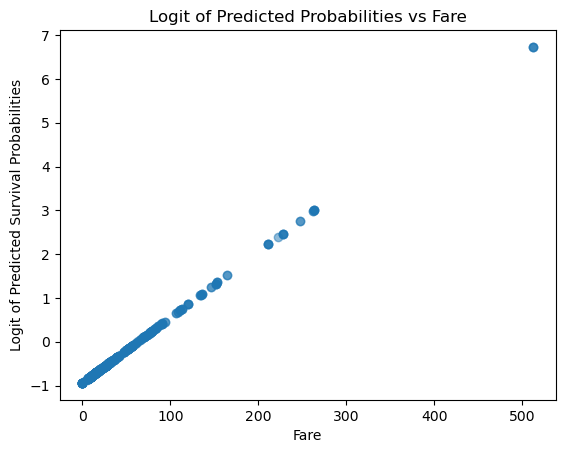

In [115]:
testing = train.dropna(subset=['Fare'])
X = testing['Fare']
y = testing['Survived']

X = sm.add_constant(X)
logit_model1 = sm.Logit(y, X).fit()
predicted_probs1 = logit_model1.predict(X)
logit_predicted_probs1 = np.log(predicted_probs1 / (1 - predicted_probs1))

plt.scatter(testing['Fare'], logit_predicted_probs1, alpha=0.5)
plt.xlabel('Fare')
plt.ylabel('Logit of Predicted Survival Probabilities')
plt.title('Logit of Predicted Probabilities vs Fare')
plt.show()

Outlier: Fare around $500. Should it be removed?

Optimization terminated successfully.
         Current function value: 0.629394
         Iterations 5


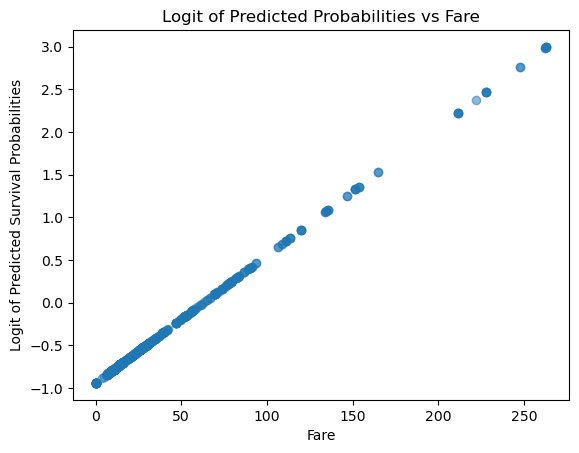

In [116]:
testing = train.dropna(subset=['Fare'])
testing = testing.loc[testing['Fare']<500]
X = testing['Fare']
y = testing['Survived']

X = sm.add_constant(X)
logit_model2 = sm.Logit(y, X).fit()
predicted_probs2 = logit_model2.predict(X)
logit_predicted_probs2 = np.log(predicted_probs2 / (1 - predicted_probs2))

plt.scatter(testing['Fare'], logit_predicted_probs2, alpha=0.5)
plt.xlabel('Fare')
plt.ylabel('Logit of Predicted Survival Probabilities')
plt.title('Logit of Predicted Probabilities vs Fare')
plt.show()

In [117]:
aic = logit_model1.aic
bic = logit_model1.bic
print(f"\nAIC: {aic}")
print(f"BIC: {bic}")

aic = logit_model2.aic
bic = logit_model2.bic
print(f"\nAIC: {aic}")
print(f"BIC: {bic}")



AIC: 1119.2940152572512
BIC: 1128.874209728279

AIC: 1119.2868497162306
BIC: 1128.8602836174407


In [118]:
# import statsmodels.api as sm
# import matplotlib.pyplot as plt

# # deviance_residuals1 = logit_model1.resid_deviance

# # Plot deviance residuals vs. predicted values
# plt.scatter(logit_model1.predict(), deviance_residuals1)
# plt.axhline(0, color='red', linestyle='--')
# plt.xlabel('Predicted Values')
# plt.ylabel('Deviance Residuals')
# plt.title('Deviance Residuals vs Predicted Values')
# plt.show()

<Axes: xlabel='Age', ylabel='Frequency'>

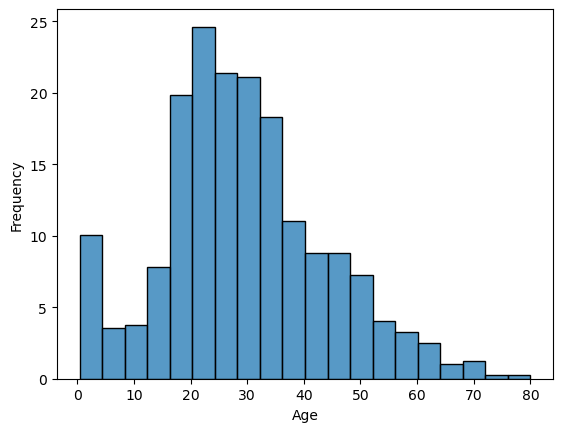

In [119]:
sns.histplot(x='Age', data=train, stat='frequency')

In [120]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# # Q-Q plot
# stats.probplot(train['Age'], dist="norm", plot=plt)
# plt.show()
np.isnan(train['Age']).value_counts()

Age
False    712
True     177
Name: count, dtype: int64

In [121]:
print(train['Age'].median(), train['Age'].mean())

28.0 29.64209269662921


In [122]:
train['AgeC'] = train['Age'].fillna(train['Age'].median())
import statsmodels.api as sm
import pandas as pd

# Assuming 'Age' and 'Survived' are columns in your dataset
X = train[['AgeC']]
X = sm.add_constant(X)  # Add constant (intercept term)
y = train['Survived']

# Fit the logistic regression model (linear term only)
model_linear = sm.Logit(y, X).fit()
print(model_linear.summary())


Optimization terminated successfully.
         Current function value: 0.662792
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      887
Method:                           MLE   Df Model:                            1
Date:                Sat, 05 Oct 2024   Pseudo R-squ.:                0.003697
Time:                        12:41:31   Log-Likelihood:                -589.22
converged:                       True   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                   0.03652
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1523      0.171     -0.891      0.373      -0.487       0.183
AgeC          -0.0112      0.

In [123]:
train['t_AgeC'] = train['AgeC'] ** (1/2)

X_poly = train[['AgeC', 't_AgeC']]
X_poly = sm.add_constant(X_poly)  # Add constant (intercept term)

# Fit the logistic regression model with the polynomial term
model_poly = sm.Logit(y, X_poly).fit()
print(model_poly.summary())

Optimization terminated successfully.
         Current function value: 0.656403
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            2
Date:                Sat, 05 Oct 2024   Pseudo R-squ.:                 0.01330
Time:                        12:41:31   Log-Likelihood:                -583.54
converged:                       True   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                 0.0003833
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5145      0.540      2.806      0.005       0.457       2.572
AgeC           0.0600      0.

In [124]:
train['Age_log_Age'] = train['AgeC'] * np.log(train['AgeC'])
X_bt = train[['AgeC', 'Age_log_Age']]
X_bt = sm.add_constant(X_bt)

model_bt = sm.Logit(y, X_bt).fit()
print(model_bt.summary())

Optimization terminated successfully.
         Current function value: 0.657714
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            2
Date:                Sat, 05 Oct 2024   Pseudo R-squ.:                 0.01133
Time:                        12:41:31   Log-Likelihood:                -584.71
converged:                       True   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                  0.001230
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7835      0.360      2.173      0.030       0.077       1.490
AgeC           -0.1743    

In [125]:
train['t_AgeC'] = train['AgeC'] ** 2
train['Age_log_Age'] = train['t_AgeC'] * np.log(train['t_AgeC'])
X_bt = train[['t_AgeC', 'Age_log_Age']]
X_bt = sm.add_constant(X_bt)

model_bt = sm.Logit(y, X_bt).fit()
print(model_bt.summary())

Optimization terminated successfully.
         Current function value: 0.662713
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            2
Date:                Sat, 05 Oct 2024   Pseudo R-squ.:                0.003816
Time:                        12:41:31   Log-Likelihood:                -589.15
converged:                       True   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                    0.1047
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0884      0.199     -0.444      0.657      -0.479       0.302
t_AgeC         -0.0023    

In [126]:
train['Age_log_Age'] = train['AgeC'] * np.log(train['AgeC'])
X_bt = train[['AgeC', 'Age_log_Age']]
X_bt = sm.add_constant(X_bt)

model_bt = sm.Logit(y, X_bt).fit()
print(model_bt.summary())

Optimization terminated successfully.
         Current function value: 0.657714
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            2
Date:                Sat, 05 Oct 2024   Pseudo R-squ.:                 0.01133
Time:                        12:41:31   Log-Likelihood:                -584.71
converged:                       True   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                  0.001230
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7835      0.360      2.173      0.030       0.077       1.490
AgeC           -0.1743    

<Axes: xlabel='AgeC', ylabel='Survived'>

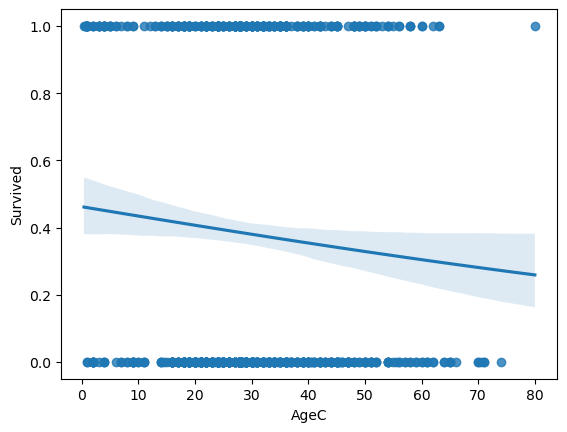

In [127]:
train['AgeC'] = train['Age'].fillna(train['Age'].median())
sns.regplot(x= 'AgeC', y= 'Survived', data= train, logistic= True)

/var/folders/fw/_g62bz0j0r74tll460_ymnd80000gp/T/ipykernel_2138/922435303.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_grouped = train.groupby('age_q')['Survived'].mean()
/opt/miniconda3/envs/titanic_env/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='age_q'>

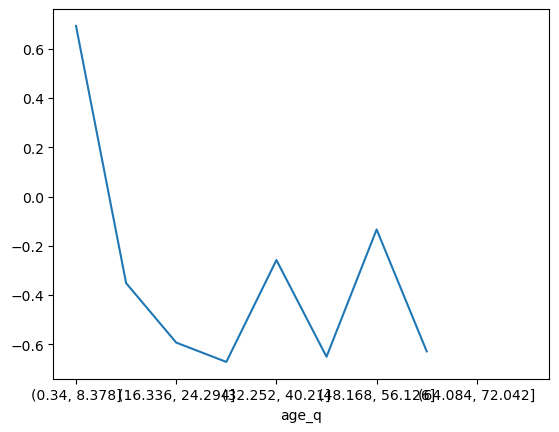

In [128]:
import pandas as pd
import numpy as np

train['AgeC'] = train['Age'].fillna(train['Age'].mean())
# Divide a continuous variable (like Fare) into quantiles
train['age_q'] = pd.cut(train['AgeC'], bins=10)

# Calculate log-odds for each quantile
train_grouped = train.groupby('age_q')['Survived'].mean()
log_odds = np.log(train_grouped / (1 - train_grouped))

# Plot to see if the relationship is linear
log_odds.plot()

/var/folders/fw/_g62bz0j0r74tll460_ymnd80000gp/T/ipykernel_2138/1563316398.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_grouped = train.groupby('age_q')['Survived'].mean()
/opt/miniconda3/envs/titanic_env/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='age_q'>

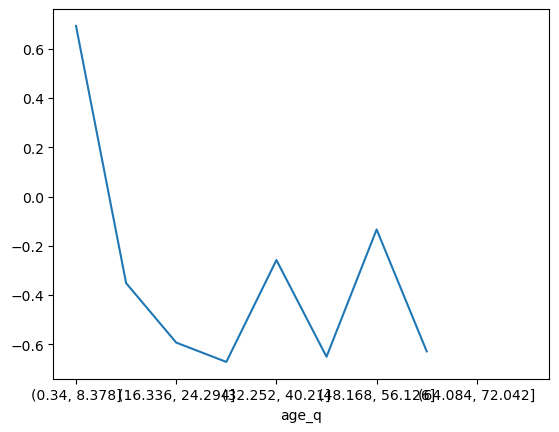

In [129]:

train['AgeC'] = train['Age'].fillna(train['Age'].median())
# Divide a continuous variable (like Fare) into quantiles
train['age_q'] = pd.cut(train['AgeC'], bins=10)

# Calculate log-odds for each quantile
train_grouped = train.groupby('age_q')['Survived'].mean()
log_odds = np.log(train_grouped / (1 - train_grouped))

# Plot to see if the relationship is linear
log_odds.plot()

mean and median value for age is very similar. But, the distribution is skewed, so will go with median
But the logit 

/var/folders/fw/_g62bz0j0r74tll460_ymnd80000gp/T/ipykernel_2138/3521511625.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_grouped = train.groupby('age_q')['Survived'].mean()
/opt/miniconda3/envs/titanic_env/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='age_q'>

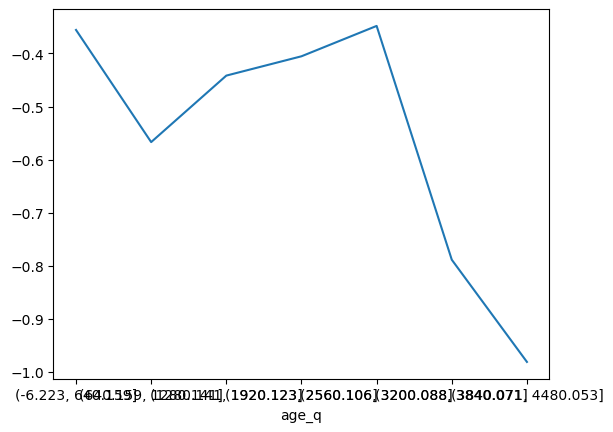

In [130]:
train['t_AgeC'] = train['AgeC'] ** 2
# train['t_AgeC'] = train['AgeC'] ** (1/3)
# train['t_AgeC'] =np.log(train['AgeC'] + 1)
train['age_q'] = pd.cut(train['t_AgeC'], bins=10)

# Calculate log-odds for each quantile
train_grouped = train.groupby('age_q')['Survived'].mean()
log_odds = np.log(train_grouped / (1 - train_grouped))

# Plot to see if the relationship is linear
log_odds.plot()

<Axes: xlabel='Embarked', ylabel='Age'>

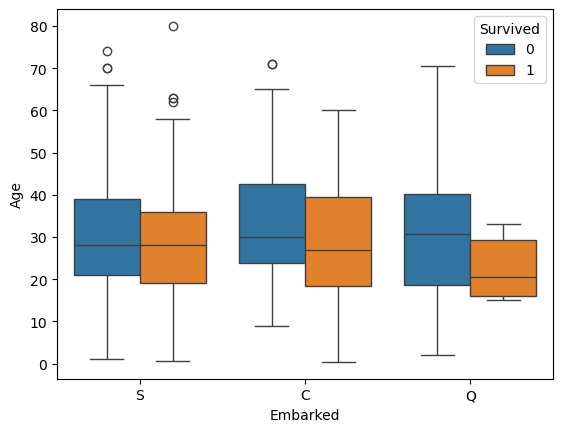

In [131]:
sns.boxplot(data=train, hue="Survived", y='Age', x='Embarked')

<Axes: xlabel='Survived', ylabel='Fare'>

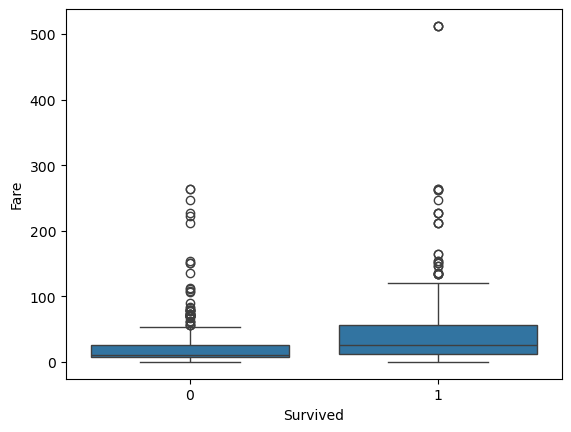

In [132]:
sns.boxplot(data=train, x="Survived", y='Fare')

In [133]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


test['name_title']=test['Name'].apply(lambda x: re.search(r", (.*?)\.", x).group(1))
test['name_title'].value_counts()

## Ordinal

### Spearman's Rank Correlation assumption
1. monotonic: as one variable increases, the other either consistently increases or consistently decreases

- null hypothesis: varables are independent (no relationship between two variables)
- alt. hypothesis: variables are dependent (relationship between two variables)

In [19]:
stats.spearmanr(train['Pclass'],train['Survived'])

SignificanceResult(statistic=-0.3369166846101059, pvalue=4.8902050487023535e-25)

<Axes: xlabel='Pclass'>

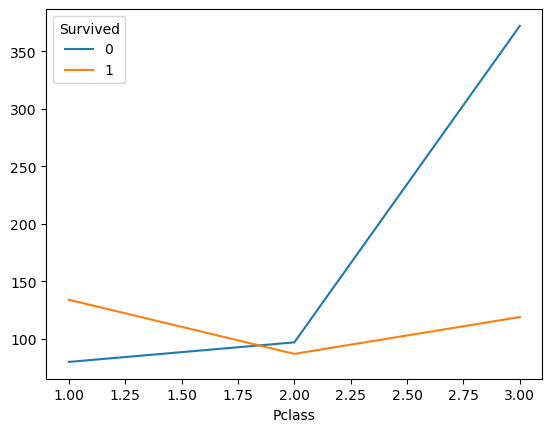

In [22]:
crosstab=pd.crosstab(train['Pclass'],train['Survived'])
res = stats.chi2_contingency(crosstab)
print(crosstab, "pval: ", res.pvalue, "freq: ", res.expected_freq, sep='\n')

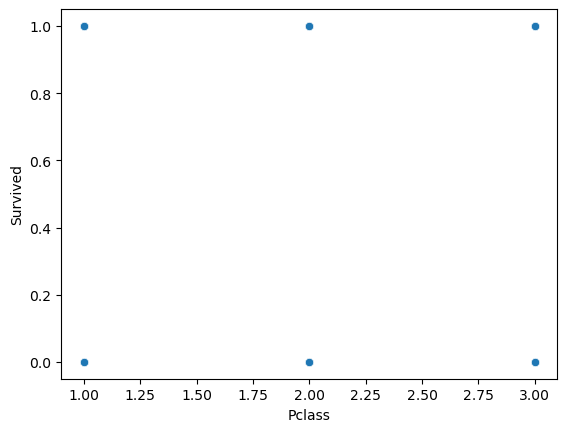

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example scatterplot to check monotonic relationship
sns.scatterplot(x=train['Pclass'], y=train['Survived'])
plt.show()

In [47]:
test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [18]:
import researchpy as rp
crosstab, test_results, expected = rp.crosstab(train['Survived'],train['Sex'],
                                               test="chi-square",
                                               expected_freqs=True,
                                               prop='cell')

/opt/miniconda3/envs/titanic_env/lib/python3.10/site-packages/researchpy/crosstab.py:146: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Pearson Chi-square ( 1.0) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = f"Pearson Chi-square ({dof: .1f}) = "


In [19]:
print(crosstab)
print(test_results)

            Sex               
Sex      female   male     All
Survived                      
0          9.09  52.53   61.62
1         26.15  12.23   38.38
All       35.24  64.76  100.00
                Chi-square test   results
0  Pearson Chi-square ( 1.0) =   263.0506
1                    p-value =     0.0000
2               Cramer's phi =     0.5434


In [11]:
train.assign(
    ticket_flg=train['Ticket'].apply(lambda x: np.where(re.search(r"^[0-9]",x)==None,1,0))
# ).query("ticket_flg==1")["Ticket"]) ## seems like non alphanumerical value is a nuances
    ,ticket_alpha=train['Ticket'].apply(lambda x:''.join(re.findall(r'[a-zA-Z]',x)).upper())
)['ticket_alpha'].value_counts()

ticket_alpha
             661
PC            60
CA            41
A             28
STONO         18
SOTONOQ       15
SCPARIS       11
WC            10
SOC            6
C              5
FCC            5
LINE           4
WEP            3
PP             3
SOPP           3
SOTONO         2
SCAH           2
SWPP           2
PPP            2
FC             1
SCAHBASLE      1
AS             1
SOP            1
SC             1
SCOW           1
FA             1
SP             1
SCA            1
CASOTON        1
Name: count, dtype: int64

Out of 891 passengers, 891-661=230 passengers have alphabet in the ticket. Could this be significant? 

In [12]:
temp1=train.assign(
    ticket_flg=train['Ticket'].apply(lambda x: np.where(re.search(r"^[0-9]",x)==None,1,0))
# ).query("ticket_flg==1")["Ticket"]) ## seems like non alphanumerical value is a nuances
    ,ticket_alpha=train['Ticket'].apply(lambda x:''.join(re.findall(r'[a-zA-Z]',x)).upper())
)

In [28]:
temp1.groupby('ticket_alpha').agg(
    survived=('Survived','sum'),
    total=('Survived', 'count')
# ).apply(lambda x: x['survived']*100/x['total'], axis=1)
).assign(perc=lambda d: d['survived']*100/d['total']).sort_values(by='total', ascending=False)

,survived,total,perc
ticket_alpha,,,
,254,661,38.426626
PC,39,60,65.000000
CA,14,41,34.146341
A,2,28,7.142857
STONO,8,18,44.444444
SOTONOQ,2,15,13.333333
SCPARIS,5,11,45.454545
WC,1,10,10.000000
SOC,1,6,16.666667


In [ ]:
train.loc[(train['SibSp']==0)&(train['Parch']==0)&(train['Cabin']!='NA')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
...,...,...,...,...,...,...,...,...,...,...,...,...
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


NA values on Age and Cabin

In [ ]:
train.groupby(['Pclass','Sex']).agg(
    null_count = ('Cabin',lambda x: x.isnull().sum()),
    row_count = ('Cabin','size'),
    null_percentage = ('Cabin', lambda x: x.isnull().sum()/np.size(x))
    )

null_count  row_count  null_percentage
Pclass Sex                                           
1      female          13         94         0.138298
       male            27        122         0.221311
2      female          66         76         0.868421
       male           102        108         0.944444
3      female         138        144         0.958333
       male           341        347         0.982709

Pclass 2,3 group is missing majority of Cabin data 

In [ ]:
train.assign(cabin_flg=np.where(train.Cabin.isna(),"null","notnull")).groupby(['Pclass','cabin_flg']).agg(
    min=('Fare','min'),
    max=('Fare','max'),
    mean=('Fare','mean')
)

min       max       mean
Pclass cabin_flg                            
1      notnull     0.00  512.3292  85.815152
       null        0.00  512.3292  76.848643
2      notnull    10.50   39.0000  18.063544
       null        0.00   73.5000  20.909673
3      notnull     7.65   22.3583  11.698608
       null        0.00   69.5500  13.725077

In [ ]:
train.assign(
    cabin_flg=np.where(train.Cabin.isna(),"null","notnull"),
    fare_flg=np.where(train.Fare==0,"zero","notzero")).groupby(['Pclass','cabin_flg','fare_flg']).agg(
    size = ('Fare','size')
)

size
Pclass cabin_flg fare_flg      
1      notnull   notzero    173
                 zero         3
       null      notzero     38
                 zero         2
2      notnull   notzero     16
       null      notzero    162
                 zero         6
3      notnull   notzero     12
       null      notzero    475
                 zero         4

In [ ]:
# t['test']=train.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
# print(t[['Cabin','test']].sort_values(by=['test'], ascending=False))
t['Ticket'].apply(lambda x: ''.join(re.findall(r"[a-zA-Z]", x)))

0          A
1         PC
2      STONO
3           
4           
       ...  
886         
887         
888       WC
889         
890         
Name: Ticket, Length: 891, dtype: object

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
# from sklearn.svm import SVC, LinearSVC
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import cross_val_score


# # Set the style for seaborn
# sns.set(style="whitegrid")
# # Create a mock dataset with two features
# X, y = make_classification(n_samples=100, n_features=2, n_informative=2, 
#                            n_redundant=0, n_clusters_per_class=1, 
#                            n_classes=2, class_sep=2, random_state=42)

# # Convert to a DataFrame for easier manipulation and visualization
# df = pd.DataFrame(X, columns=['feature1', 'feature2'])
# df['target'] = y
# # Plotting the data
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x='feature1', y='feature2', hue='target', data=df, palette='coolwarm', s=100)
# plt.title("Scatter Plot of Mock Data")
# plt.show()


ModuleNotFoundError: No module named 'sklearn'

In [ ]:
import os
print(os.environ.get('VIRTUAL_ENV'))

None
